# <center>  Childbed fever </center>

In this notebook we are going to analyze one of the tragic event happened in 1840s, **a deadly disease** of women that died after just have given the birth. The data were collected by Hungarian physician **Dr. Ignaz Semmelweis** in the beginning 1800s, who was puzzled with high rates of women's deads in clinics right after the births. This particular dataset was retrieved from **Kaggle**, link: https://www.kaggle.com/yassershrief/handwashing-vs-childbed-fever



In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [132]:
df=pd.read_csv('../Денис/dataset/yearly_deaths_by_clinic(1).csv',parse_dates=['year'])

In [133]:
print(df.shape)
df.head(15)

(12, 4)


,year,births,deaths,clinic
0,1841-01-01,3036,237,clinic 1
1,1842-01-01,3287,518,clinic 1
2,1843-01-01,3060,274,clinic 1
3,1844-01-01,3157,260,clinic 1
4,1845-01-01,3492,241,clinic 1
5,1846-01-01,4010,459,clinic 1
6,1841-01-01,2442,86,clinic 2
7,1842-01-01,2659,202,clinic 2
8,1843-01-01,2739,164,clinic 2
9,1844-01-01,2956,68,clinic 2


At first glance, we observe that every year the share of deaths out of births is appoximately 6% and higher, lets plot the graph to reveal these relationships

In [136]:
df.describe()

,births,deaths
count,12.000000,12.000000
mean,3152.750000,223.333333
std,449.078476,145.383089
min,2442.000000,66.000000
25%,2901.750000,100.250000
50%,3108.500000,219.500000
75%,3338.250000,263.500000
max,4010.000000,518.000000


The ratio of deaths to births for 5 years is 7.083763%


<Figure size 1080x576 with 0 Axes>

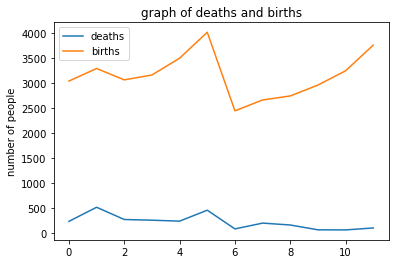

In [141]:
percent=df['deaths'].sum()/df['births'].sum()
print('The ratio of deaths to births for 5 years is {:%}'.format(percent))
plt.figure(figsize=(15,8))
df[['deaths','births']].plot(title='graph of deaths and births',ylabel='number of people');

### 1. Conclusion
Indeed, the average share of deaths is 7%, moreover, in some years the rate is reached by 10%. However, we have to consider a precise proportion of death to births and split the informaton into clinics, since it would more valuable data for further analysis

In [21]:
df['proportions_death']=df['deaths']/df['births']
df_clinic1=df[df['clinic']=='clinic 1']
df_clinic2=df[df['clinic']=='clinic 2']

In [147]:
df_clinic1.head(15)

,year,births,deaths,clinic,proportions_death
0,1841-01-01,3036,237,clinic 1,0.078063
1,1842-01-01,3287,518,clinic 1,0.157591
2,1843-01-01,3060,274,clinic 1,0.089542
3,1844-01-01,3157,260,clinic 1,0.082357
4,1845-01-01,3492,241,clinic 1,0.069015
5,1846-01-01,4010,459,clinic 1,0.114464


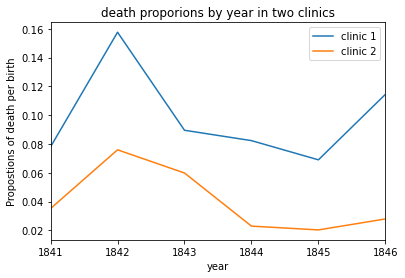

In [145]:

ax=df_clinic1.plot(x='year',y='proportions_death',title='death proporions by year in two clinics',label='clinic 1')
df_clinic2.plot(x='year',y='proportions_death',ylabel='Propostions of death per birth',ax=ax,label='clinic 2');

### 2. Conclusion
Why is the proportion of deaths in clinic 1 is significantly higher compared to clinic 2?? The same question concered Dr.Semmelweis. It turns out, **that these two clinics were served by different medical students**. For instance, a major amount of ordinary med.students served first one, while midwife the second clinic. Thats probably the reason of a huge gap between these proportions. (Source:https://en.wikipedia.org/wiki/Historical_mortality_rates_of_puerperal_fever) 
We also have a montly data of clinic 1, lets analyze it too

In [45]:
df_month=pd.read_csv('../Денис/dataset/monthly_deaths.csv',parse_dates=['date'])
df_month['deaths per birth']=df_month['deaths']/df_month['births']

In [66]:
print(df_month.shape)
df_month.head(15)

(98, 4)


,date,births,deaths,deaths per birth
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
5,1841-06-01,200,10,0.050000
6,1841-07-01,190,16,0.084211
7,1841-08-01,222,3,0.013514
8,1841-09-01,213,4,0.018779
9,1841-10-01,236,26,0.110169


<Figure size 1080x576 with 0 Axes>

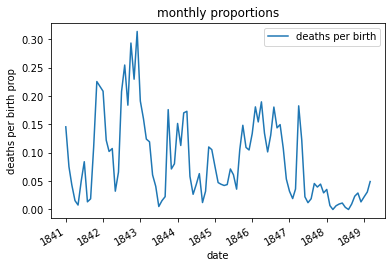

In [50]:
plt.figure(figsize=(15,8))
ax=df_month.plot(x='date',y='deaths per birth',ylabel='deaths per birth prop',title='monthly proportions')

### 3. Conclusion
This is the dynamic of deaths per births in months. We clearly see that during 8 years the rate was predominantly growing. However, we can observe a decrease in the middle of 1847 year and since that moment the data were not collected anymore, did something happened? Yes, in June of this year, **Dr. Semmelweis made an obligatory handwashing** for associate personal and students. Apparently, after that event the rate of deaths tended to decrease, but how much?

In [55]:
before=df_month[df_month['date']<=(pd.to_datetime('1847-06-01'))]['deaths per birth']
after=df_month[df_month['date']>(pd.to_datetime('1847-06-01'))]['deaths per birth']
mean_differ=after.mean()-before.mean()
mean_differ

-0.08294472769332184

The reduction is approximately by **8%**, which is pretty good. Just to be sure, we could to create a bootstrap and find the 95% confidence interval

In [63]:
all_all=[]
def bootstrap(data1,data2,function):
    bef=np.random.choice(data1,len(data1))
    aft=np.random.choice(data2,len(data2))
    diff=function(aft)-function(bef)
    all_all.append(diff)
    return all_all

for i in range(1000):
    mean_CI=bootstrap(before,after,np.mean)

In [148]:
CI=np.percentile(mean_CI,[2.5,97.5])
CI

array([-0.10039125, -0.06590816])

Therefore, the reduction is located between **10% to 6%**. 